In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [3]:
glass_df=pd.read_csv("glass.csv")

In [4]:
glass_df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [5]:
glass_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [6]:
# There are no null values

<AxesSubplot:>

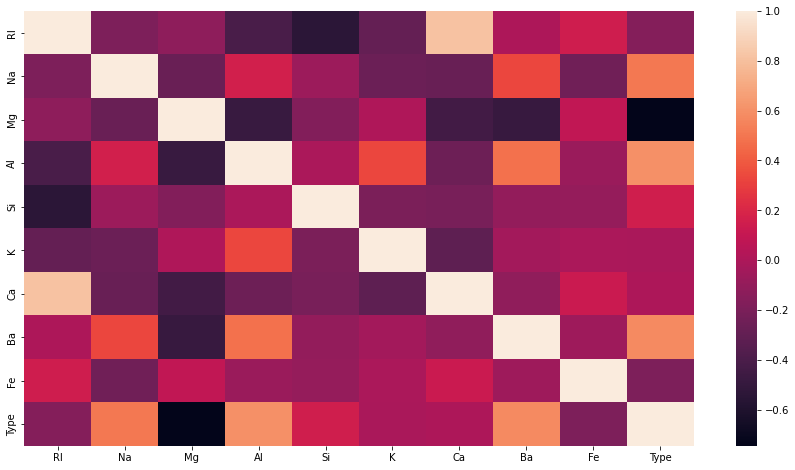

In [7]:
plt.figure(figsize=(15,8))
sns.heatmap(data=glass_df.corr())

In [8]:
# Data Preprocessing
from sklearn import preprocessing

In [9]:
X = glass_df.iloc[:, 0:-1]
Y = glass_df.iloc[:, -1]

In [10]:
Y.value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [11]:
X

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [12]:

minMax_scaler = preprocessing.MinMaxScaler()
glass_norm_x=minMax_scaler.fit_transform(X)

In [13]:
glass_norm_x

array([[0.43283582, 0.43759398, 1.        , ..., 0.30855019, 0.        ,
        0.        ],
       [0.28358209, 0.47518797, 0.80178174, ..., 0.22304833, 0.        ,
        0.        ],
       [0.22080773, 0.42105263, 0.79064588, ..., 0.21840149, 0.        ,
        0.        ],
       ...,
       [0.41703248, 0.54586466, 0.        , ..., 0.27973978, 0.52063492,
        0.        ],
       [0.23529412, 0.54887218, 0.        , ..., 0.28345725, 0.4984127 ,
        0.        ],
       [0.26163301, 0.52631579, 0.        , ..., 0.2964684 , 0.53015873,
        0.        ]])

In [14]:
# Using cross validation 

In [15]:
num_folds = 10
kfold = KFold(n_splits=10)

In [16]:
model = KNeighborsClassifier(n_neighbors=10)
score = cross_val_score(model, glass_norm_x, Y, cv=kfold)

In [17]:
print(score.mean())

0.4235930735930736


# Grid Search to find the best k value

In [18]:
from sklearn.model_selection import GridSearchCV

In [19]:
X_gs=glass_df.iloc[:,0:-1]
Y_gs=glass_df.iloc[:,-1]

In [20]:
n_neighbors=np.array([2*i+1 for i in range(0,20)])
param_grid=dict(n_neighbors=n_neighbors)

In [21]:
#param_grid

In [22]:
model=KNeighborsClassifier()
grid=GridSearchCV(estimator=model,
                  param_grid=param_grid,
                  cv=10)

In [23]:
grid.fit(glass_norm_x,Y_gs)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39])})

In [24]:
print(grid.best_params_)
print(grid.best_score_)

{'n_neighbors': 5}
0.6590909090909091


In [25]:
# best score is for k=5

# Plot the scores for diff k values

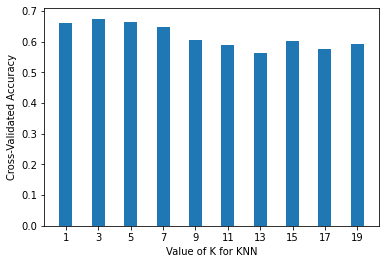

In [26]:
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
# choose k between 1 to 41
k_range = [2*i+1 for i in range(0,10)]
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, glass_norm_x, Y, cv=20)
    k_scores.append(scores.mean())
# plot to see clearly
plt.bar(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.xticks(k_range)
plt.show()